In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import glob

from itertools import zip_longest 
from IPython.display import display

# <center>PERCORSI DI BASE</center>

In [14]:
BASE_DIR = "../BD-Image-Segmentation-Comp/" 
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TRAIN_CSV = os.path.join(BASE_DIR, 'train.csv')

# <center>OPERAZIONI SUL FILE `train.csv`</center>

In [15]:
train_df = pd.read_csv(TRAIN_CSV)

#print(train_df)
train_df.head()


,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN


In [16]:
# Calcolo del numero di istanze per ogni classe
class_counts = train_df['class'].value_counts()

Creazione del grafico a barre con colori personalizzati per ogni classe

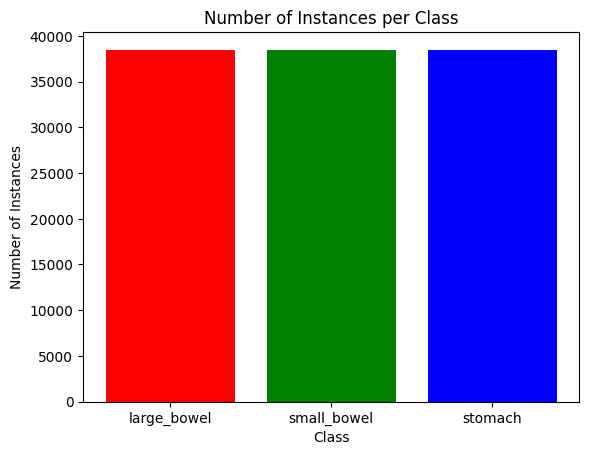

In [17]:
colors = ['red', 'green', 'blue']
plt.bar(class_counts.index, class_counts.values, color=[colors[i] for i in range(len(class_counts))])

# Aggiunta delle etichette dell'asse x e y e del titolo del grafico
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Number of Instances per Class')

# Mostrare il grafico
plt.show()

Voglio mostrare solo le istanze del DataFrame che hanno una segmentazione non nulla

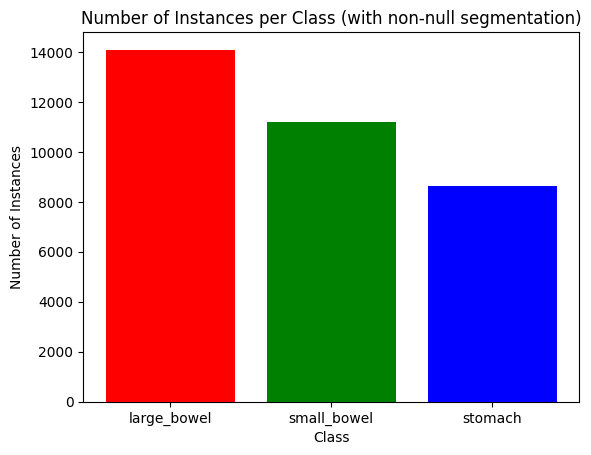

In [18]:
# Eliminazione delle righe con valori mancanti nella colonna "segmentation"
df_filtered = train_df.dropna(subset=['segmentation'])

# Calcolo del numero di istanze per ogni classe nella colonna "class" del DataFrame filtrato
class_counts = df_filtered['class'].value_counts()

# Creazione del grafico a barre con colori personalizzati per ogni classe
colors = ['red', 'green', 'blue']
plt.bar(class_counts.index, class_counts.values, color=[colors[i] for i in range(len(class_counts))])

# Aggiunta delle etichette dell'asse x e y e del titolo del grafico
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Number of Instances per Class (with non-null segmentation)')

# Mostrare il grafico
plt.show()

Abbiamo creato un DataFrame di esempio con alcune righe che hanno valori mancanti nella colonna 
"segmentation" e altre righe con una segmentazione definita. Abbiamo quindi utilizzato il metodo 
dropna() del DataFrame per eliminare le righe con valori mancanti nella colonna "segmentation" e 
creare un nuovo DataFrame "df_filtered" solo con le righe rimanenti.

Successivamente, abbiamo utilizzato il DataFrame filtrato "df_filtered" per calcolare il numero 
di istanze per ogni classe nella colonna "class", utilizzando la funzione value_counts() come nel 
precedente esempio. Infine, abbiamo creato un grafico a barre con i risultati e abbiamo aggiunto 
le etichette dell'asse x, dell'asse y e del titolo del grafico.

In [19]:
# Sostituisco le classi con valori numerici per una miglior leggibilità
class_mapping = {'large_bowel': 0, 'small_bowel': 1, 'stomach': 2}

train_df['class'] = train_df['class'].replace(class_mapping)

splits = train_df['id'].str.split("_", n = 4, expand = True)
#print(splits)

train_df['case_id'] = splits[0]
train_df['day_id'] = splits[1]
train_df['slice_id'] = splits[3].astype(int)

train_df['case_id'] = train_df['case_id'].str.replace('case', '').astype(int) 
train_df['day_id'] = train_df['day_id'].str.replace('day', '').astype(int)

# Elimino le colonne "class" e "segmentation" e ne salvo il contenuto in due liste quasi omonime
classe = train_df.pop('class')
segmentation = train_df.pop('segmentation')

# Raggruppo gli elementi delle liste in gruppi di tre
grouped_segmentation = list(zip_longest(*[iter(segmentation)]*3, fillvalue=None))
grouped_class = list(zip_longest(*[iter(classe)]*3, fillvalue=None))

# Elimino i duplicati sulla colonna "id"
train_df = train_df.drop_duplicates(subset=['id'])

# Reinserisco le colonne alla fine del dataframe
train_df.insert(len(train_df.columns), 'class', grouped_class)
train_df.insert(len(train_df.columns), 'segmentation', grouped_segmentation)

# ordino in ordine crescente in base a case_id, day_id e slice_id
train_df = train_df.sort_values(by=['case_id', 'day_id', 'slice_id'], ascending=True).reset_index(drop=True)

train_df.head()

,id,case_id,day_id,slice_id,class,segmentation
0,case2_day1_slice_0001,2,1,1,"(0, 1, 2)","(nan, nan, nan)"
1,case2_day1_slice_0002,2,1,2,"(0, 1, 2)","(nan, nan, nan)"
2,case2_day1_slice_0003,2,1,3,"(0, 1, 2)","(nan, nan, nan)"
3,case2_day1_slice_0004,2,1,4,"(0, 1, 2)","(nan, nan, nan)"
4,case2_day1_slice_0005,2,1,5,"(0, 1, 2)","(nan, nan, nan)"


# <center>OPERAZIONI SUGLI ELEMENTI DELLA CARTELLA `train`</center>

In [20]:
list_slices = glob.glob(TRAIN_DIR+'/*/*/scans/*.png')
#print(list_slices)

image_details = pd.DataFrame({'path':list_slices})

splits = image_details['path'].str.split("/", n = 7, expand = True)

image_details[['case_id', 'day_id']] = splits[4].str.split("_", expand = True)

image_details['case_id'] = image_details['case_id'].str.replace('case', '').astype(int) 
image_details['day_id'] = image_details['day_id'].str.replace('day', '').astype(int)

image_details['slice_name'] = splits[6]

slice_info = image_details['slice_name'].str.split(n=6, expand=True, pat="_")

image_details['slice_id'] = slice_info[1].astype(int)

image_details['width'] = slice_info[2].astype(int)
image_details['height'] = slice_info[3].astype(int)

image_details['width_px'] = slice_info[4].astype(float)
#.round(2).apply(lambda x: '{:.2f}'.format(x))
image_details['height_px'] = slice_info[5].str.replace('.png', '', regex=False).astype(float)

# ordino in ordine crescente in base a case_id, day_id e slice_id
image_details = image_details.sort_values(by=['case_id', 'day_id', 'slice_id'], ascending=True).reset_index(drop=True)

image_details.head()
#print(image_details)

,path,case_id,day_id,slice_name,slice_id,width,height,width_px,height_px
0,../BD-Image-Segmentation-Comp/train/case2/case...,2,1,slice_0001_266_266_1.50_1.50.png,1,266,266,1.5,1.5
1,../BD-Image-Segmentation-Comp/train/case2/case...,2,1,slice_0002_266_266_1.50_1.50.png,2,266,266,1.5,1.5
2,../BD-Image-Segmentation-Comp/train/case2/case...,2,1,slice_0003_266_266_1.50_1.50.png,3,266,266,1.5,1.5
3,../BD-Image-Segmentation-Comp/train/case2/case...,2,1,slice_0004_266_266_1.50_1.50.png,4,266,266,1.5,1.5
4,../BD-Image-Segmentation-Comp/train/case2/case...,2,1,slice_0005_266_266_1.50_1.50.png,5,266,266,1.5,1.5


## <center>GRAFICO PER MOSTRARE QUANTE IMMAGINI HANNO PROFONDITA' 1.50 mm E QUANTE 1.63 mm</center>

Il numero di immagini con width_px e height_px pari a 1.50 mm è: 37296
Il numero di immagini con width_px e height_px pari a 1.63 mm è: 1200
38496


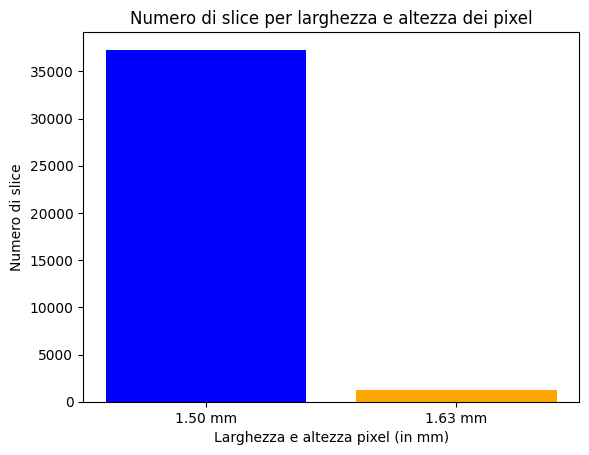

In [21]:
# Voglio vedere quante immagini hanno profondità dei pixel 1.50 mm e quante 1.63 mm
num_images_150 = image_details.loc[(image_details['width_px'] == 1.50) & (image_details['height_px'] == 1.50)].shape[0]
print("Il numero di immagini con width_px e height_px pari a 1.50 mm è:", num_images_150)

num_images_163 = image_details.loc[(image_details['width_px'] == 1.63) & (image_details['height_px'] == 1.63)].shape[0]
print("Il numero di immagini con width_px e height_px pari a 1.63 mm è:", num_images_163)

print(num_images_150+num_images_163)

# Dati per il grafico
labels = ['1.50 mm', '1.63 mm']
num_images = [num_images_150, num_images_163]

# Colori per le barre
colors = ['blue', 'orange']

# Creazione del grafico a barre
fig, ax = plt.subplots()
ax.bar(labels, num_images, color=colors)

# Aggiunta di titoli e label
ax.set_title('Numero di slice per larghezza e altezza dei pixel')
ax.set_xlabel('Larghezza e altezza pixel (in mm)')
ax.set_ylabel('Numero di slice')

# Visualizzazione del grafico
plt.show()

## Controllo per vedere se le immagini con una data profondità sono tutte delle stesse dimensioni

In [22]:
# Voglio vedere se le immagini con una data profondità sono tutte delle stesse dimensioni

widths_px_1_50 = image_details[(image_details['width_px'] == 1.5) & (image_details['height_px'] == 1.5)]['width'].unique()
print(widths_px_1_50)

heights_px_1_50 = image_details[(image_details['width_px'] == 1.5) & (image_details['height_px'] == 1.5)]['height'].unique()
print(heights_px_1_50)

widths_px_63 = image_details[(image_details['width_px'] == 1.63) & (image_details['height_px'] == 1.63)]['width'].unique()
print(widths_px_63)

heights_px_1_63 = image_details[(image_details['width_px'] == 1.63) & (image_details['height_px'] == 1.63)]['height'].unique()
print(heights_px_1_63)

[266 360 234]
[266 310 234]
[276]
[276]


si evince che le slice con profondità dei pixel pari a 1.50 mm hanno dimensione variabile, mentre quelle a profondità pari a 1.63 mm hanno tutte la stessa dimensione

## Controllo per vedere se le immagini con larghezza pari a 266 hanno altezza variabile e viceversa

In [23]:
# Adesso voglio vedere se le immagini con larghezza pari a 266 hanno altezza variabile e viceversa
heights_266 = image_details[(image_details['width'] == 266)]['height'].unique()
print(heights_266)

widths_266 = image_details[(image_details['height'] == 266)]['width'].unique()
print(widths_266)

# Voglio vedere quante immagini hanno larghezza 266
num_images_266_width = image_details.loc[(image_details['width'] == 266)].shape[0]
print("Il numero di immagini con larghezza 266 px è:", num_images_266_width)

# Voglio vedere quante immagini hanno altezza 266
num_images_266_height = image_details.loc[(image_details['height'] == 266)].shape[0]
print("Il numero di immagini con altezza 266 px è:", num_images_266_height)

num_images_266x266 = image_details.loc[(image_details['width'] == 266) & (image_details['height'] == 266)].shape[0]
print("Il numero di immagini 266x266 è:", num_images_266x266)

[266]
[266]
Il numero di immagini con larghezza 266 px è: 25920
Il numero di immagini con altezza 266 px è: 25920
Il numero di immagini 266x266 è: 25920


Ho dimostrato che le immagini con altezza/larghezza 266 sono quadrate

In [24]:
# Faccio lo stesso con le immagini larghe 234
heights_234 = image_details[(image_details['width'] == 234)]['height'].unique()
print(heights_234)

widths_234 = image_details[(image_details['height'] == 234)]['width'].unique()
print(widths_234)

# Voglio vedere quante immagini hanno larghezza 234
num_images_234_width = image_details.loc[(image_details['width'] == 234)].shape[0]
print("Il numero di immagini con larghezza 234 px è:", num_images_234_width)

# Voglio vedere quante immagini hanno altezza 234
num_images_234_height = image_details.loc[(image_details['height'] == 234)].shape[0]
print("Il numero di immagini con altezza 234 px è:", num_images_234_height)

num_images_234x234 = image_details.loc[(image_details['width'] == 234) & (image_details['height'] == 234)].shape[0]
print("Il numero di immagini 234x234 è:", num_images_234x234)

[234]
[234]
Il numero di immagini con larghezza 234 px è: 144
Il numero di immagini con altezza 234 px è: 144
Il numero di immagini 234x234 è: 144


Ho dimostrato che le immagini con altezza/larghezza 234 sono quadrate

In [25]:
# Mi torno l'altezza delle immagini larghe 360
heights_360 = image_details[(image_details['width'] == 360)]['height'].unique()
print(heights_360)

# Mi torno la larghezza delle immagini alte 310
widths_310 = image_details[(image_details['height'] == 310)]['width'].unique()
print(widths_310)

# Voglio vedere quante immagini hanno altezza 360
num_images_360_width = image_details.loc[(image_details['width'] == 360)].shape[0]
print("Il numero di immagini con larghezza 360 px è:", num_images_360_width)

# Voglio vedere quante immagini hanno altezza 310
num_images_310_height = image_details.loc[(image_details['height'] == 310)].shape[0]
print("Il numero di immagini con altezza 310 px è:", num_images_310_height)

num_images_360x310 = image_details.loc[(image_details['width'] == 360) & (image_details['height'] == 310)].shape[0]
print("Il numero di immagini 360x310 è:", num_images_360x310)

[310]
[360]
Il numero di immagini con larghezza 360 px è: 11232
Il numero di immagini con altezza 310 px è: 11232
Il numero di immagini 360x310 è: 11232


Ho dimostrato che le tutte immagini larghe 360 hanno altezza 310

In [26]:
tot_slice = num_images_266x266 + num_images_234x234 + num_images_360x310

print("totale slice profondità pixel 1.50 mm: ", tot_slice)

totale slice profondità pixel 1.50 mm:  37296


I valori combaciano :)
Creo un grafico dal quale si evince quanto fatto in maniera qualitativa

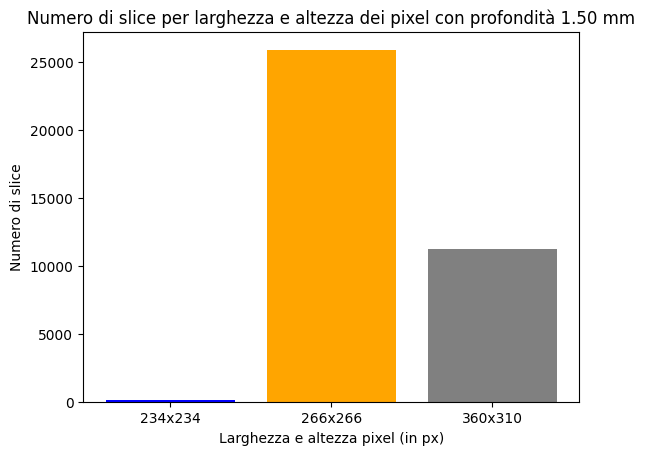

In [27]:
# Dati per il grafico
labels = ['234x234', '266x266', '360x310']
num_slices = [num_images_234x234, num_images_266x266, num_images_360x310]

# Colori per le barre
colors = ['blue', 'orange', 'grey']

# Creazione del grafico a barre
plt.bar(labels, num_slices, color=colors)

# Aggiunta di titoli e label
plt.title('Numero di slice per larghezza e altezza dei pixel con profondità 1.50 mm')
plt.xlabel('Larghezza e altezza pixel (in px)')
plt.ylabel('Numero di slice')

# Visualizzazione del grafico
plt.show()

Dal dataframe "image_details" mi estraggo le righe le cui slice hanno dimensione 234x234

In [28]:
image_details_234x234 = image_details[(image_details['width'] == 234) & (image_details['height'] == 234)].copy()
image_details_234x234.head()

,path,case_id,day_id,slice_name,slice_id,width,height,width_px,height_px
32512,../BD-Image-Segmentation-Comp/train/case139/ca...,139,0,slice_0001_234_234_1.50_1.50.png,1,234,234,1.5,1.5
32513,../BD-Image-Segmentation-Comp/train/case139/ca...,139,0,slice_0002_234_234_1.50_1.50.png,2,234,234,1.5,1.5
32514,../BD-Image-Segmentation-Comp/train/case139/ca...,139,0,slice_0003_234_234_1.50_1.50.png,3,234,234,1.5,1.5
32515,../BD-Image-Segmentation-Comp/train/case139/ca...,139,0,slice_0004_234_234_1.50_1.50.png,4,234,234,1.5,1.5
32516,../BD-Image-Segmentation-Comp/train/case139/ca...,139,0,slice_0005_234_234_1.50_1.50.png,5,234,234,1.5,1.5


Dal dataframe "image_details" mi estraggo le righe le cui slice hanno dimensione 266x266

In [29]:
image_details_266x266 = image_details[(image_details['width'] == 266) & (image_details['height'] == 266)].copy()
image_details_266x266.head()

,path,case_id,day_id,slice_name,slice_id,width,height,width_px,height_px
0,../BD-Image-Segmentation-Comp/train/case2/case...,2,1,slice_0001_266_266_1.50_1.50.png,1,266,266,1.5,1.5
1,../BD-Image-Segmentation-Comp/train/case2/case...,2,1,slice_0002_266_266_1.50_1.50.png,2,266,266,1.5,1.5
2,../BD-Image-Segmentation-Comp/train/case2/case...,2,1,slice_0003_266_266_1.50_1.50.png,3,266,266,1.5,1.5
3,../BD-Image-Segmentation-Comp/train/case2/case...,2,1,slice_0004_266_266_1.50_1.50.png,4,266,266,1.5,1.5
4,../BD-Image-Segmentation-Comp/train/case2/case...,2,1,slice_0005_266_266_1.50_1.50.png,5,266,266,1.5,1.5


Dal dataframe "image_details" mi estraggo le righe le cui slice hanno dimensione 276x276

In [30]:
image_details_276x276 = image_details[(image_details['width'] == 276) & (image_details['height'] == 276)].copy()
image_details_276x276.head()

,path,case_id,day_id,slice_name,slice_id,width,height,width_px,height_px
7056,../BD-Image-Segmentation-Comp/train/case34/cas...,34,0,slice_0001_276_276_1.63_1.63.png,1,276,276,1.63,1.63
7057,../BD-Image-Segmentation-Comp/train/case34/cas...,34,0,slice_0002_276_276_1.63_1.63.png,2,276,276,1.63,1.63
7058,../BD-Image-Segmentation-Comp/train/case34/cas...,34,0,slice_0003_276_276_1.63_1.63.png,3,276,276,1.63,1.63
7059,../BD-Image-Segmentation-Comp/train/case34/cas...,34,0,slice_0004_276_276_1.63_1.63.png,4,276,276,1.63,1.63
7060,../BD-Image-Segmentation-Comp/train/case34/cas...,34,0,slice_0005_276_276_1.63_1.63.png,5,276,276,1.63,1.63


Dal dataframe "image_details" mi estraggo le righe le cui slice hanno dimensione 360x310

In [31]:
image_details_360x310 = image_details[(image_details['width'] == 360) & (image_details['height'] == 310)].copy()
image_details_360x310.head()

,path,case_id,day_id,slice_name,slice_id,width,height,width_px,height_px
720,../BD-Image-Segmentation-Comp/train/case6/case...,6,0,slice_0001_360_310_1.50_1.50.png,1,360,310,1.5,1.5
721,../BD-Image-Segmentation-Comp/train/case6/case...,6,0,slice_0002_360_310_1.50_1.50.png,2,360,310,1.5,1.5
722,../BD-Image-Segmentation-Comp/train/case6/case...,6,0,slice_0003_360_310_1.50_1.50.png,3,360,310,1.5,1.5
723,../BD-Image-Segmentation-Comp/train/case6/case...,6,0,slice_0004_360_310_1.50_1.50.png,4,360,310,1.5,1.5
724,../BD-Image-Segmentation-Comp/train/case6/case...,6,0,slice_0005_360_310_1.50_1.50.png,5,360,310,1.5,1.5
